출처 : https://github.com/corazzon/finance-data-analysis/blob/main/3.1%20FinanceDataReader%EB%A5%BC%20%ED%86%B5%ED%95%9C%20%EA%B0%9C%EB%B3%84%EC%A2%85%EB%AA%A9%20%EC%88%98%EC%A7%91%ED%95%98%EA%B8%B0-input.ipynb

# 라이브러리 

In [1]:
import pandas as pd

In [2]:
import FinanceDataReader as fdr

# 삼전 일별 시세 수집

In [8]:
df = fdr.DataReader('005930', "2017", "2021")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,35980,36240,35880,36100,93012,0.001665
2017-01-03,36280,36620,36020,36480,147153,0.010526
2017-01-04,36500,36520,36100,36160,159435,-0.008772
2017-01-05,36060,36060,35540,35560,219349,-0.016593
2017-01-06,36180,36440,36040,36200,177619,0.017998


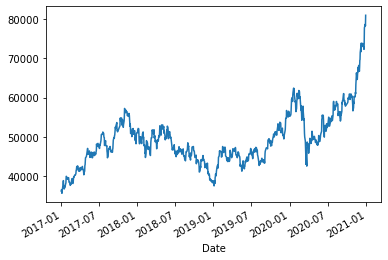

In [9]:
df["Close"].plot()

# 상장종목 목록 가져오기

In [11]:
df_krx = pd.read_csv("krx.csv")
df_krx.shape

(7206, 10)

In [13]:
df_krx[["Symbol","Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [21]:
# 상장기업 Symbol 찾기
df_krx.loc[df_krx["Name"] == "현대미포조선","Symbol"].tolist()[0]

'010620'

## 종목명으로 종목 코드 출력 함수

In [46]:
def item_code_by_item_name(item_name):
    
    item_code_list = df_krx.loc[df_krx["Name"] == item_name,"Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [52]:
item_code_by_item_name("데브시스터즈")

'194480'

## 종목명으로 일별시세 출력 함수

In [59]:
def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환
    """
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return "해당 종목명이 존재하지 않습니다"

In [62]:
find_item_list("현대미포조선",2015)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,34642,34892,33890,33940,126456,-0.028704
2015-01-05,33689,34692,33088,34542,187710,0.017737
2015-01-06,33840,34391,33238,34091,193387,-0.013057
2015-01-07,34140,34792,34090,34592,133452,0.014696
2015-01-08,34792,36246,34792,35294,203121,0.020294
...,...,...,...,...,...,...
2021-04-26,67300,73400,67300,73000,1010620,0.092814
2021-04-27,73000,74400,72200,73900,420882,0.012329
2021-04-28,74400,78700,73600,75200,1015803,0.017591


In [63]:
find_item_list("데브시스터즈")

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,7290,7410,7240,7410,7471,0.016461
2020-01-03,7430,7460,7180,7430,3284,0.002699
2020-01-06,7290,7400,7290,7370,1498,-0.008075
2020-01-07,7370,7650,7370,7500,5014,0.017639
2020-01-08,7580,7580,7230,7410,4686,-0.012000
...,...,...,...,...,...,...
2021-04-26,133400,133800,126700,127300,117321,-0.015468
2021-04-27,127500,128900,122200,123700,137848,-0.028280
2021-04-28,121100,121800,114300,118500,218036,-0.042037


# 개별종목 시세 시각화

In [64]:
stock_daily= find_item_list("현대미포조선")

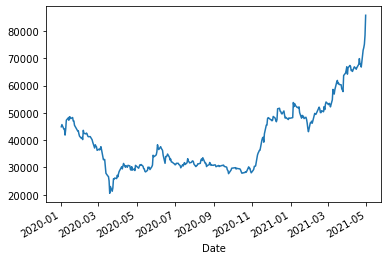

In [67]:
# pandas 

stock_daily["Close"].plot()

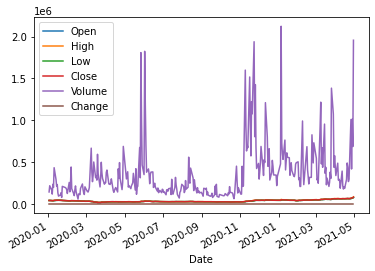

In [68]:
stock_daily.plot()

## 서브플롯

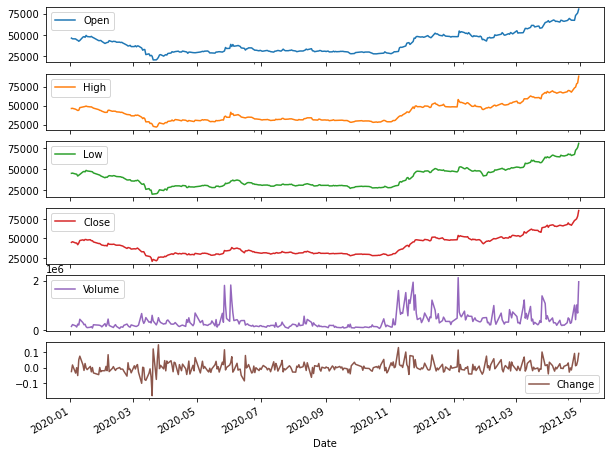

In [71]:
g = stock_daily.plot(subplots=True, figsize=(10,8))

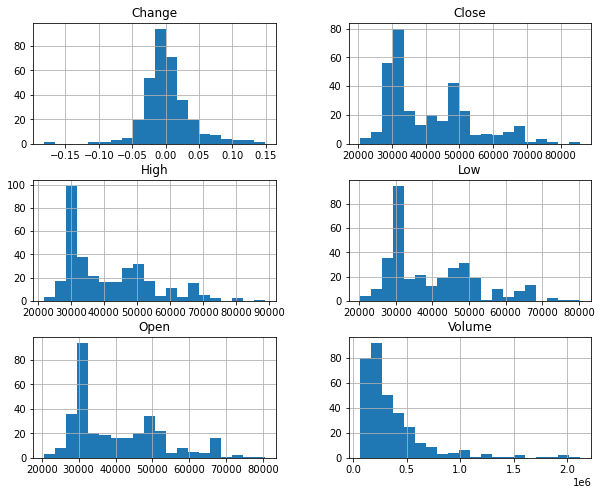

In [73]:
h=stock_daily.hist(figsize=(10,8),bins=20)

## 2축 그래프

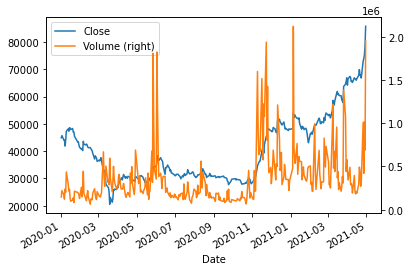

In [76]:
stock_daily[["Close","Volume"]].plot(secondary_y="Volume")

# 여러 종목 수익률 비교

In [81]:
item_code_by_item_name("삼성전자")

'005930'

In [83]:
stock_dict = {"아스트":'067390',
              "현대미포조선":'010620',
              "데브시스터즈":'194480',
              "삼성전자" : '005930'
    }

In [84]:
type(stock_dict)

dict

In [85]:
stock_dict.keys()

dict_keys(['아스트', '현대미포조선', '데브시스터즈', '삼성전자'])

In [86]:
stock_dict.values()

dict_values(['067390', '010620', '194480', '005930'])

## 여러 종목 종가 수집

In [89]:
item_list = []

for item_code in stock_dict.values():
    close = fdr.DataReader(item_code,"2020","2021")["Close"]
    item_list.append(close)

In [91]:
len(item_list)

4

In [93]:
# 리스트 병합
df = pd.concat(item_list, axis=1) #행은 axis=0 열은 axis=1
df.columns

Index(['Close', 'Close', 'Close', 'Close'], dtype='object')

In [94]:
stock_dict.keys()

dict_keys(['아스트', '현대미포조선', '데브시스터즈', '삼성전자'])

In [96]:
df.columns = stock_dict.keys()
df

,아스트,현대미포조선,데브시스터즈,삼성전자
Date,,,,
2020-01-02,8290,44900,7410,55200
2020-01-03,8220,45700,7430,55500
2020-01-06,7960,44100,7370,55500
2020-01-07,7990,44100,7500,55800
2020-01-08,7610,41850,7410,56800
...,...,...,...,...
2020-12-23,5330,48100,13600,73900
2020-12-24,5430,48350,13950,77800
2020-12-28,5170,47550,13700,78700


## 시각화

### 한글 폰트 설정

In [98]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [99]:
import matplotlib.pyplot as plt

font_family = get_font_family()

# 폰트 설정
plt.rc("font", family= font_family)
# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일
plt.style.use("ggplot")
# retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 여러 종목 한번에 시각화

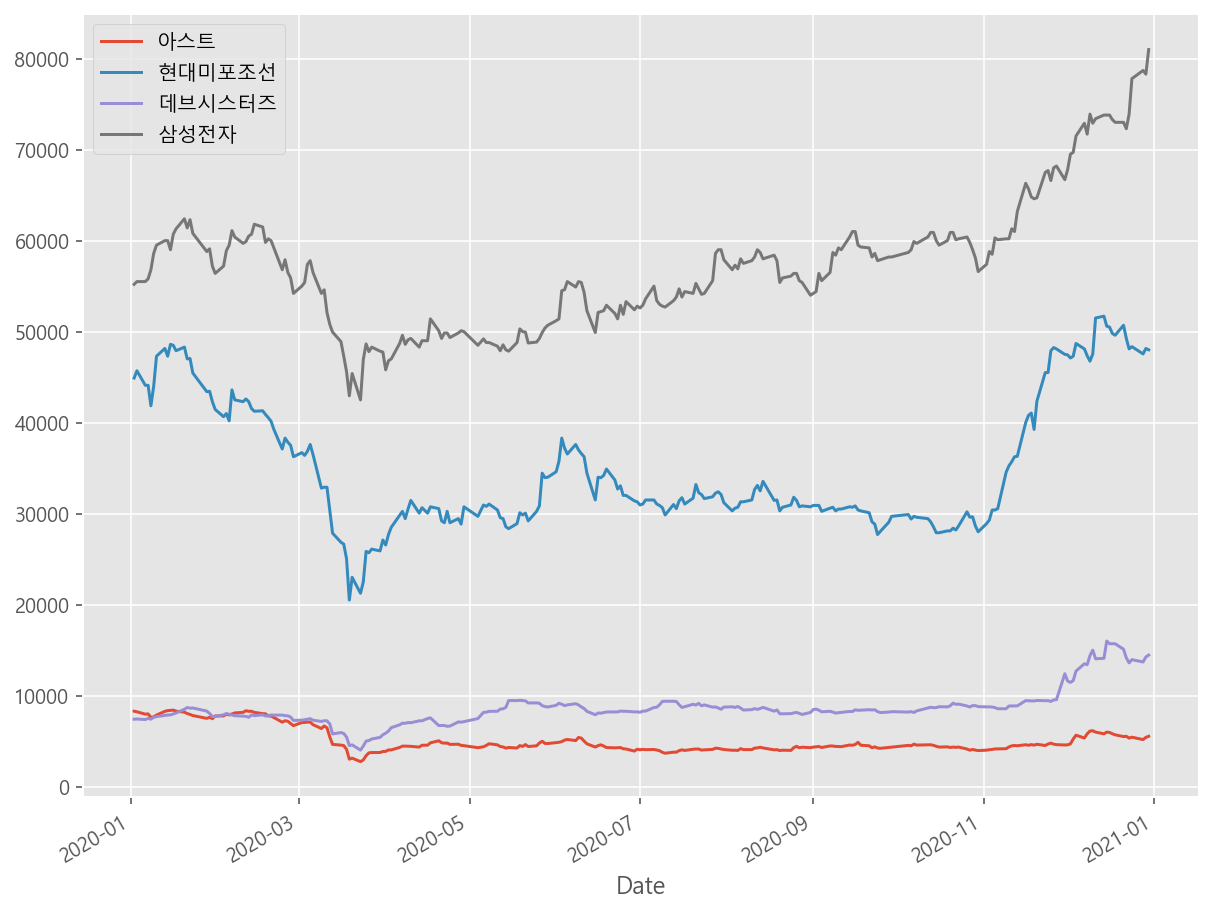

In [101]:
df.plot(figsize=(10,8))

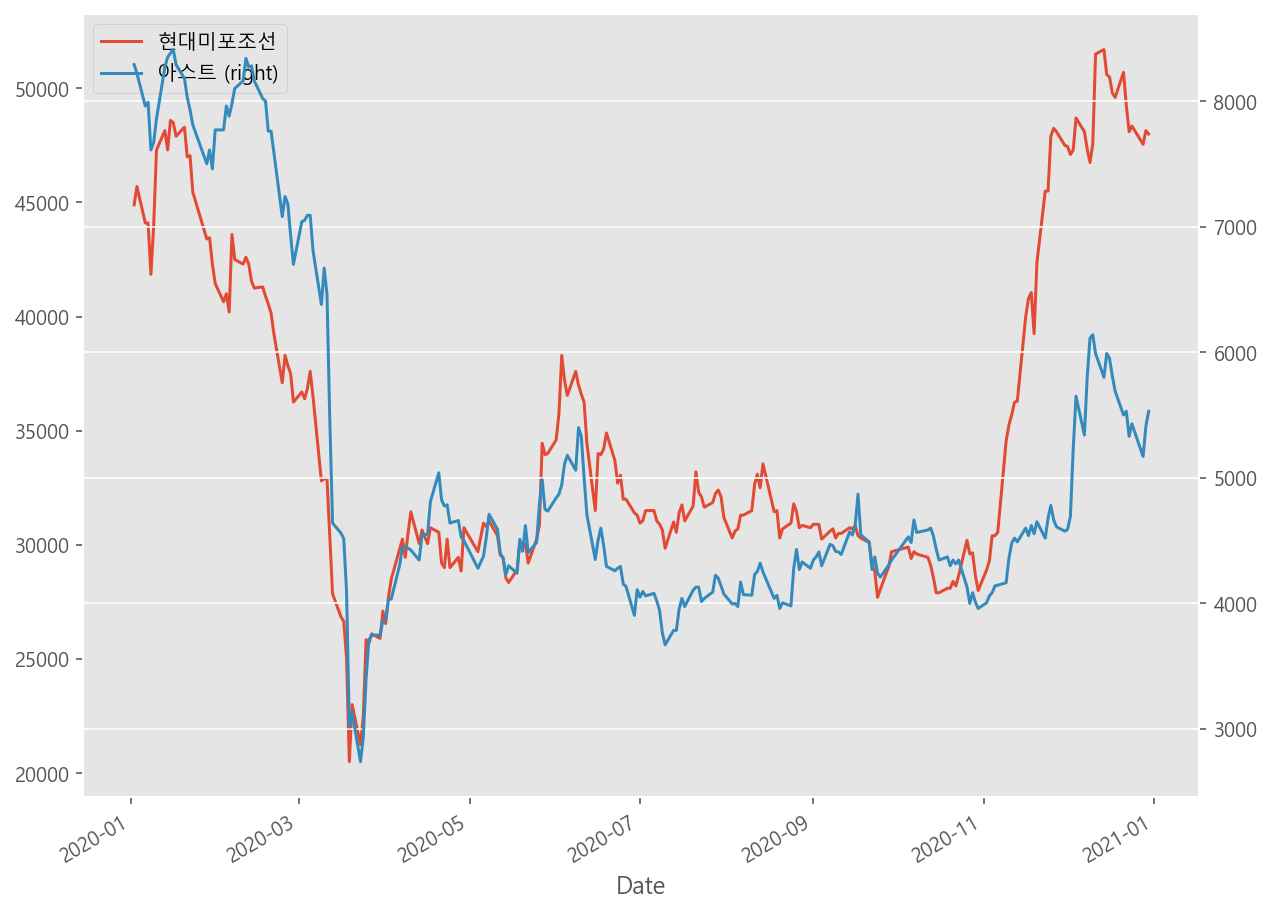

In [105]:
df[["현대미포조선","아스트"]].plot(secondary_y="아스트", figsize=(10,8))

### 기간 수익률 비교

In [110]:
df2 = df[["현대미포조선","아스트"]]
df_plot = df2 / df2.iloc[0] -1 # 첫번째 날 가격으로 나머지 가격을 나눈 값에 - 1 = 수익률
df_plot

,현대미포조선,아스트
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,0.017817,-0.008444
2020-01-06,-0.017817,-0.039807
2020-01-07,-0.017817,-0.036188
2020-01-08,-0.067929,-0.082027
...,...,...
2020-12-23,0.071269,-0.357057
2020-12-24,0.076837,-0.344994
2020-12-28,0.059020,-0.376357


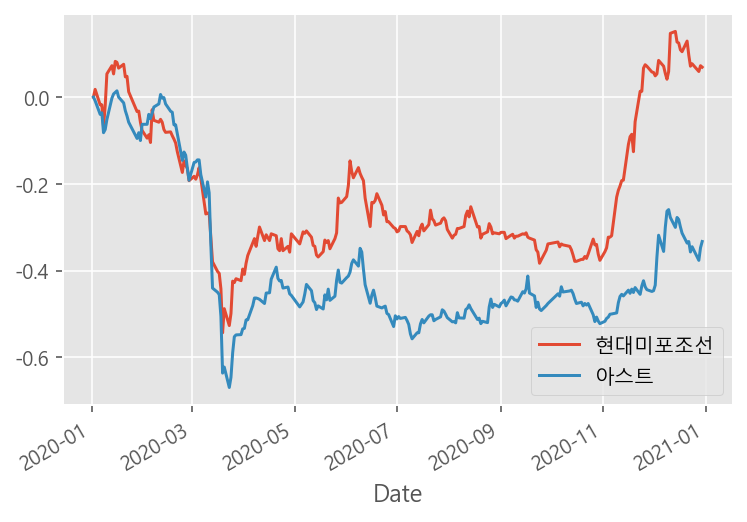

In [111]:
# 수익률 시각화
df_plot.plot()

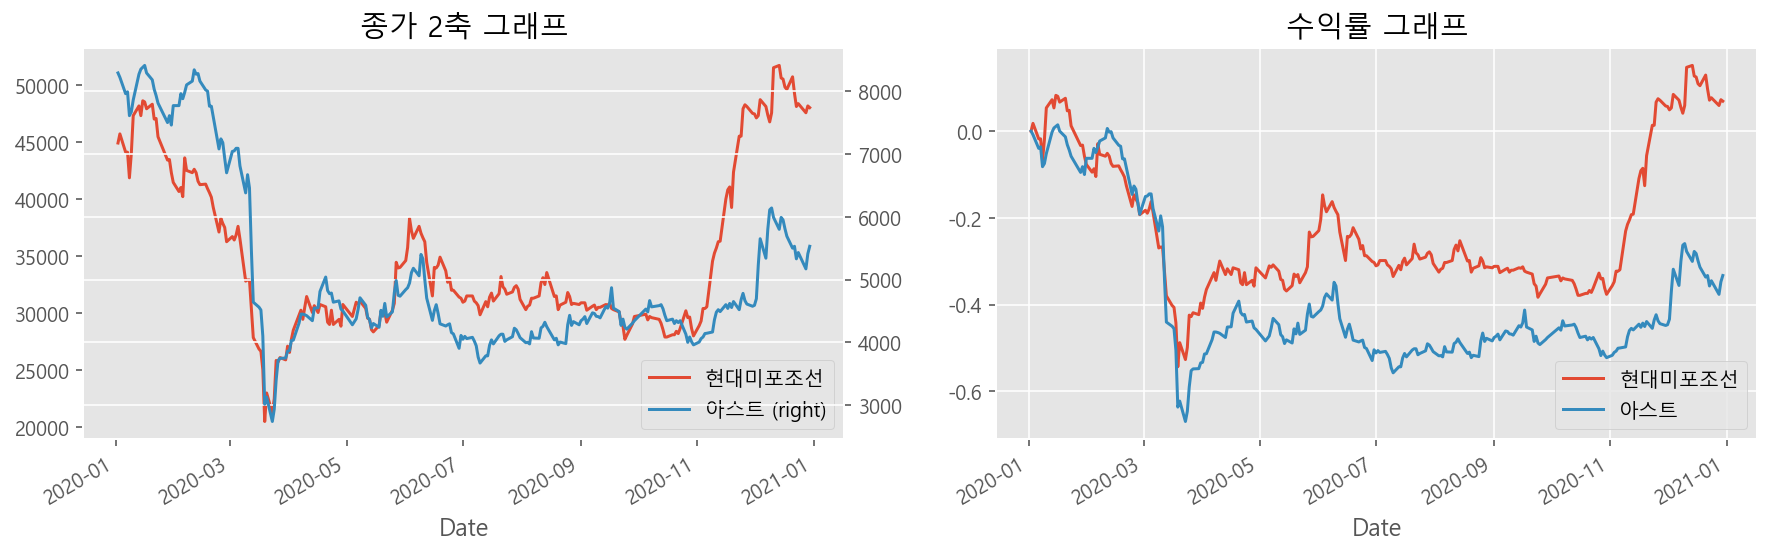

In [117]:
# 서브플롯
fig, axes = plt.subplots(1,2, figsize=(15,4))

df[["현대미포조선","아스트"]].plot(secondary_y="아스트", ax=axes[0],title="종가 2축 그래프") 
df_plot.plot(ax=axes[1],title="수익률 그래프") # 첫째날 기준 수익률 그래프

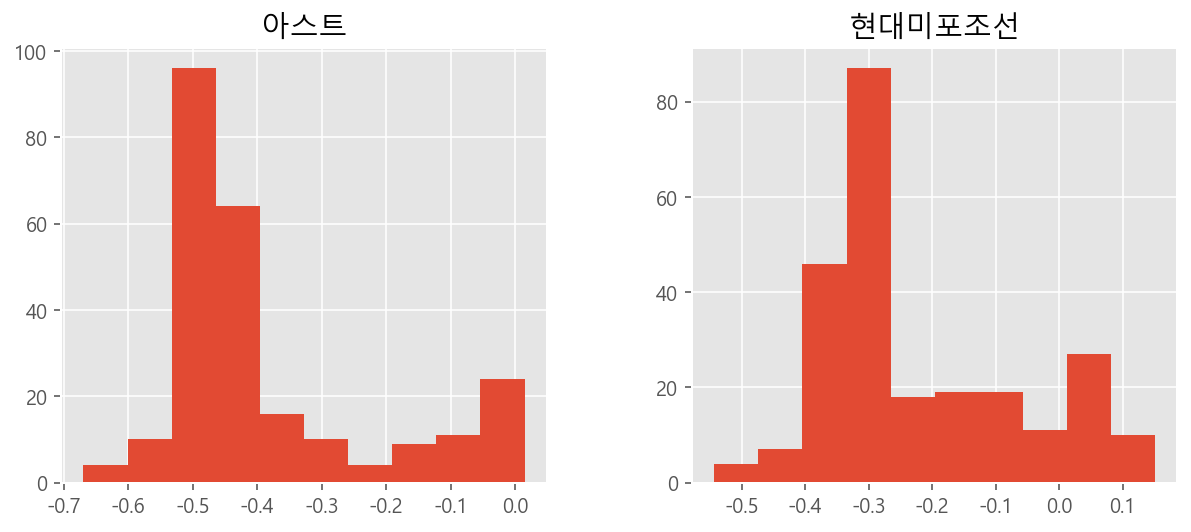

In [119]:
# 히스토그램 : 수익률 분포
a=df_plot.hist(figsize=(10,4))

### 전체 종목의 수익률 시각화

In [122]:
df_norm = df / df.iloc[0] -1 # 종목 전체 수익률
df_norm

,아스트,현대미포조선,데브시스터즈,삼성전자
Date,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000
2020-01-03,-0.008444,0.017817,0.002699,0.005435
2020-01-06,-0.039807,-0.017817,-0.005398,0.005435
2020-01-07,-0.036188,-0.017817,0.012146,0.010870
2020-01-08,-0.082027,-0.067929,0.000000,0.028986
...,...,...,...,...
2020-12-23,-0.357057,0.071269,0.835358,0.338768
2020-12-24,-0.344994,0.076837,0.882591,0.409420
2020-12-28,-0.376357,0.059020,0.848853,0.425725


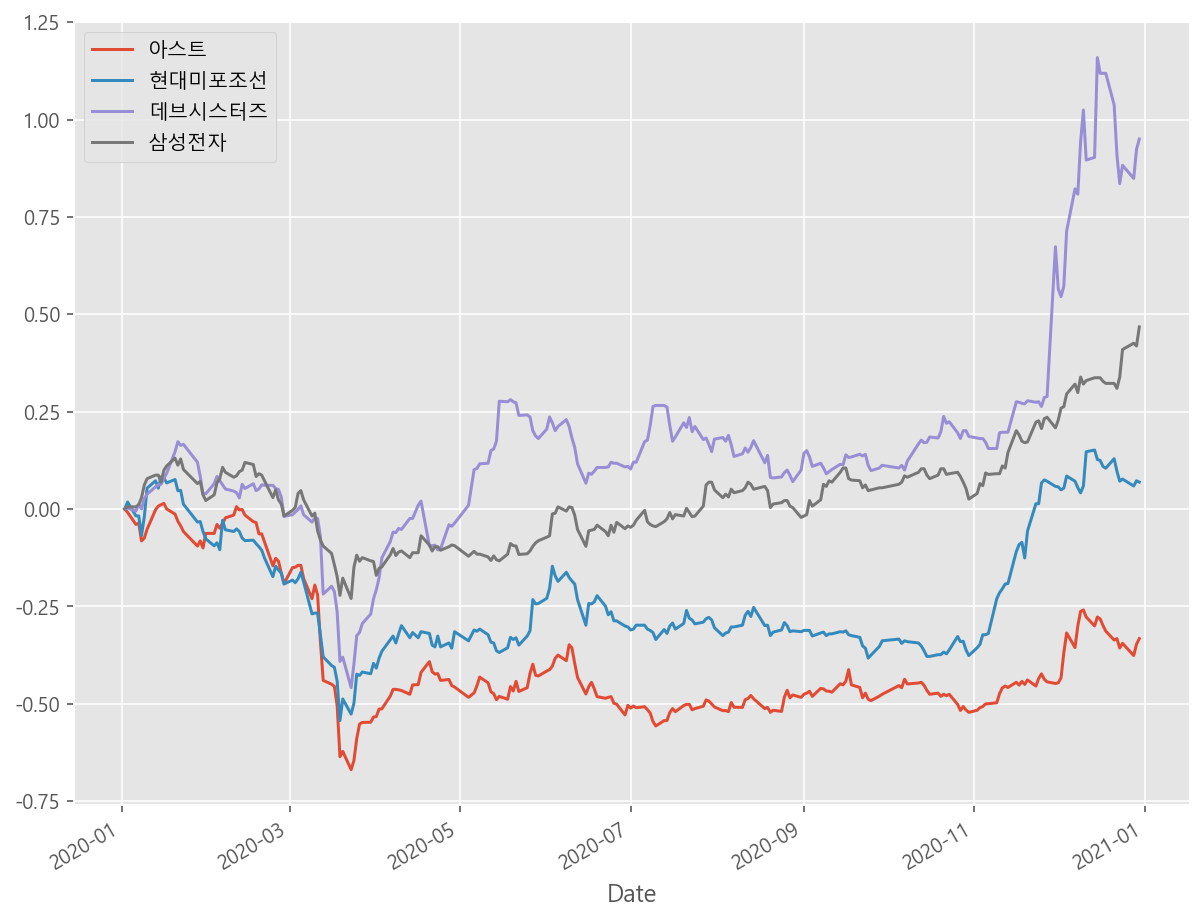

In [125]:
df_norm.plot(figsize=(10,8))

In [126]:
df_norm.describe()

,아스트,현대미포조선,데브시스터즈,삼성전자
count,248.000000,248.000000,248.000000,248.000000
mean,-0.386530,-0.222524,0.163059,0.035385
std,0.167986,0.159019,0.265736,0.127932
min,-0.669481,-0.543430,-0.458839,-0.230072
25%,-0.490802,-0.329621,0.052632,-0.052989
50%,-0.455066,-0.298441,0.127530,0.028986
75%,-0.343788,-0.102728,0.201080,0.088768
max,0.014475,0.151448,1.159244,0.467391


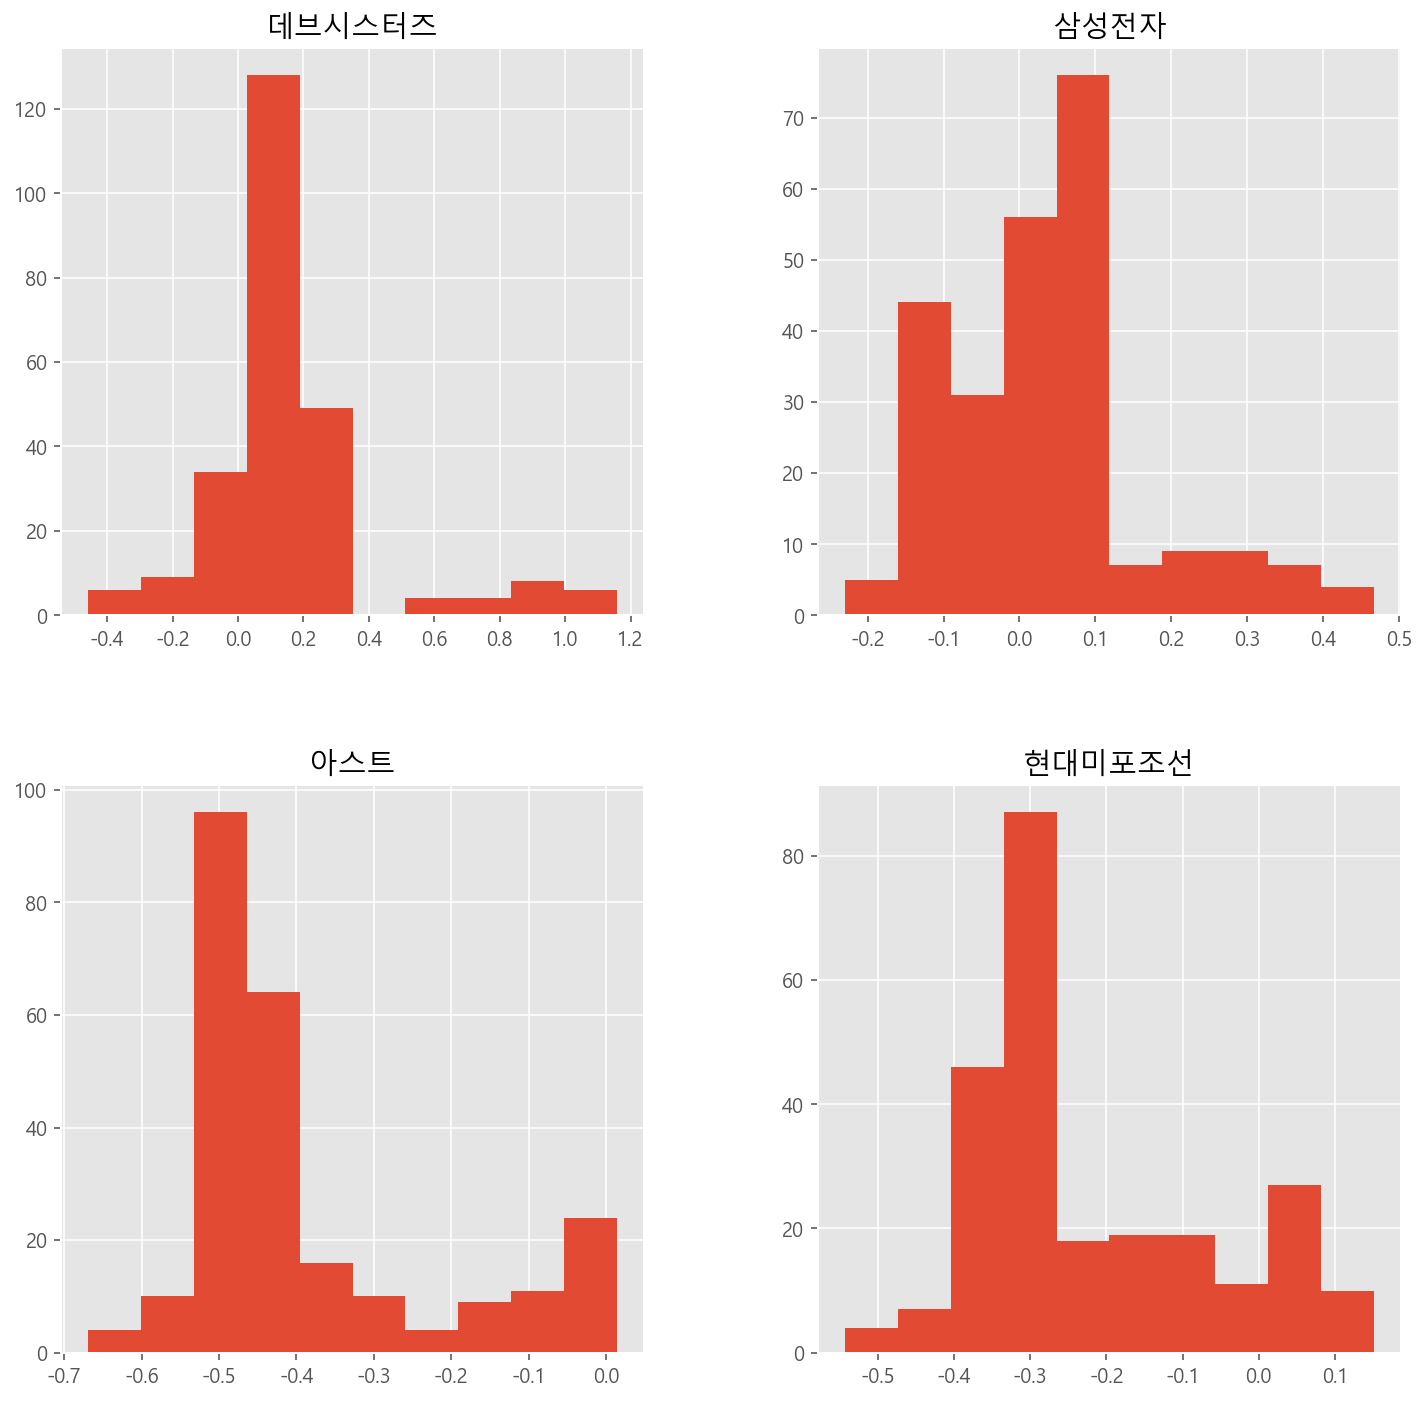

In [128]:
a=df_norm.hist(figsize=(12,12))

### 왜도

In [129]:
df_norm.skew() #클수록 왼쪽으로 치우침

아스트       1.241554
현대미포조선    0.801527
데브시스터즈    1.678194
삼성전자      0.860397
dtype: float64

### 첨도

In [130]:
df_norm.kurt() # 3보다 작으면 완만하게 납작한 분포, 작을수록 완만함

아스트       0.240227
현대미포조선   -0.493327
데브시스터즈    4.237031
삼성전자      0.940228
dtype: float64